# Student Performance Indicator

###  Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv file
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


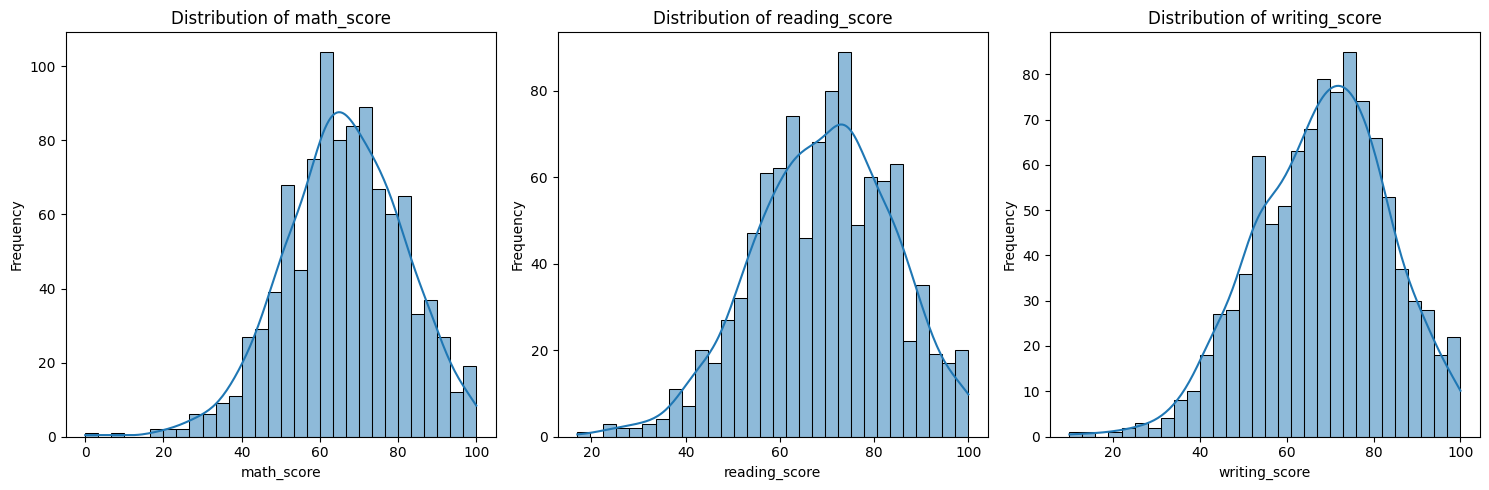

In [10]:
# Numerical features distribution
numerical_features = ['math_score', 'reading_score', 'writing_score']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Insights:  

Math scores: Slightly left-skewed, most students score 60–70  
Reading scores: More normally distributed  
Writing scores: Similar pattern to reading  

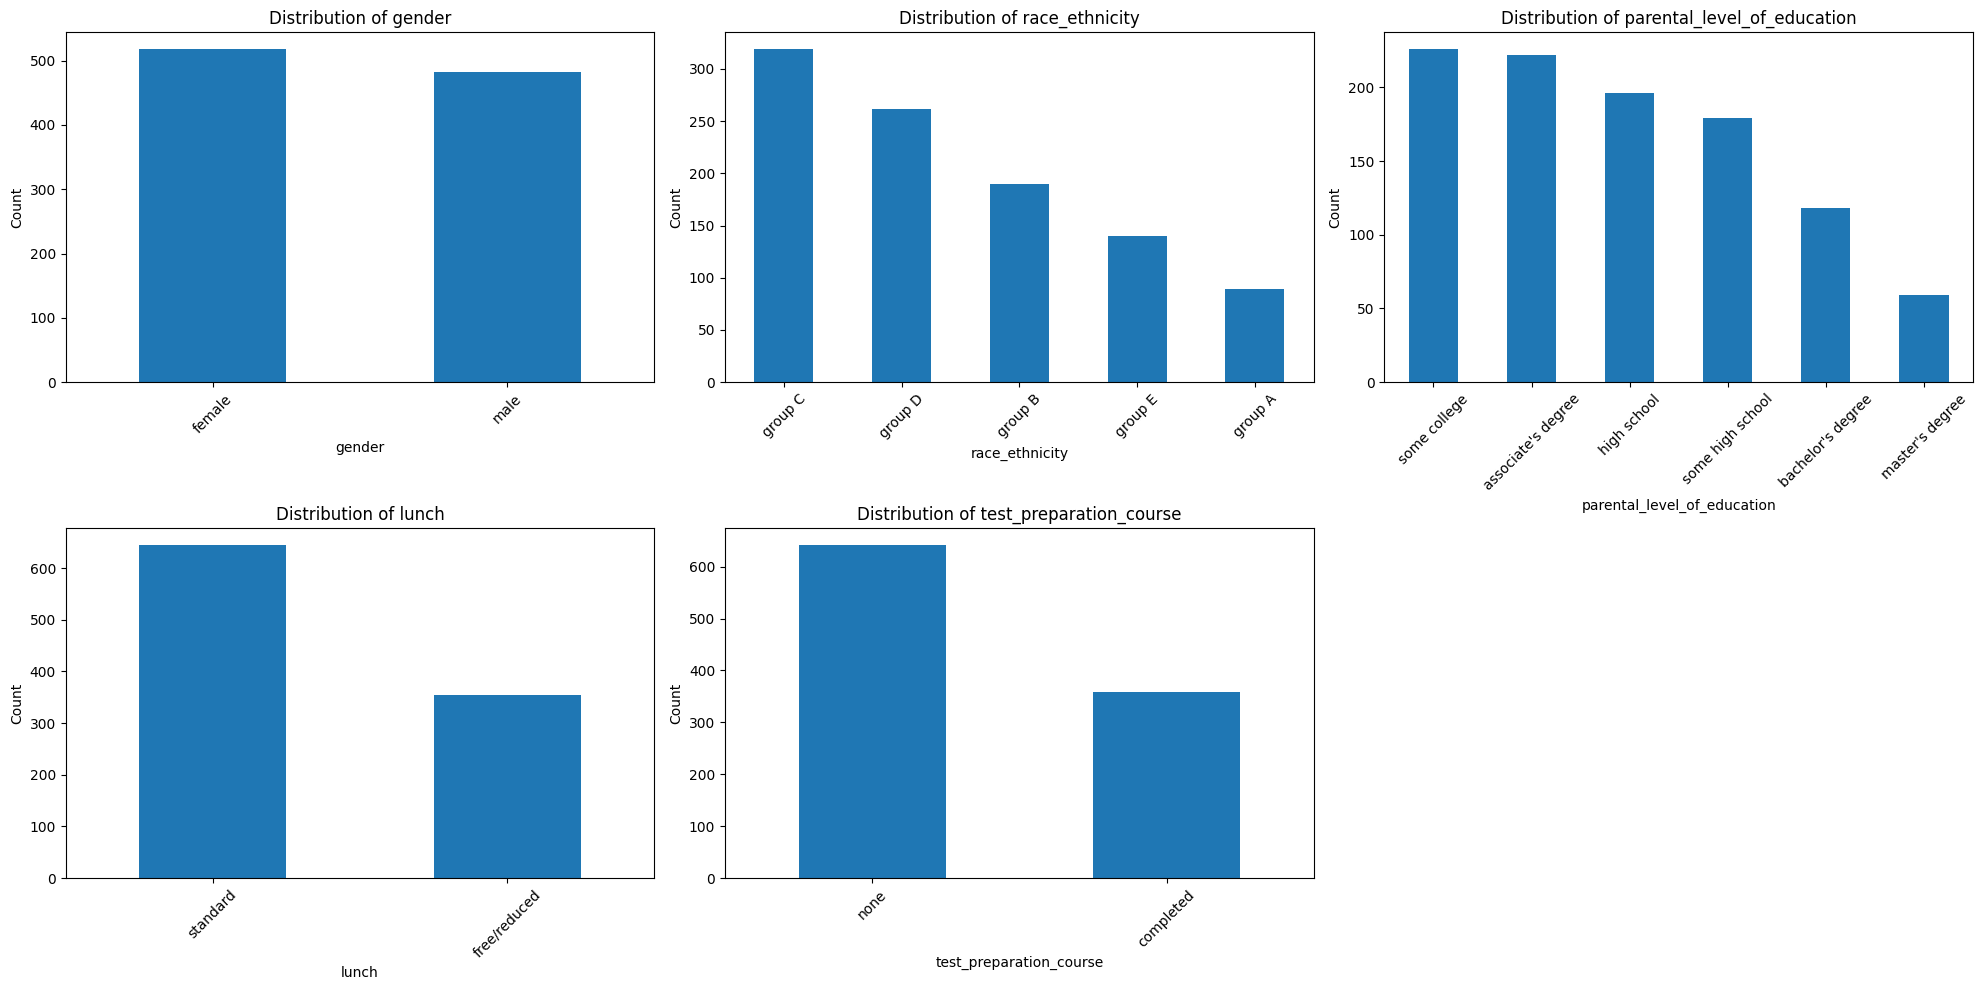

In [11]:
# Categorical features distribution
categorical_features = ['gender', 'race_ethnicity', 'parental_level_of_education', 
                        'lunch', 'test_preparation_course']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

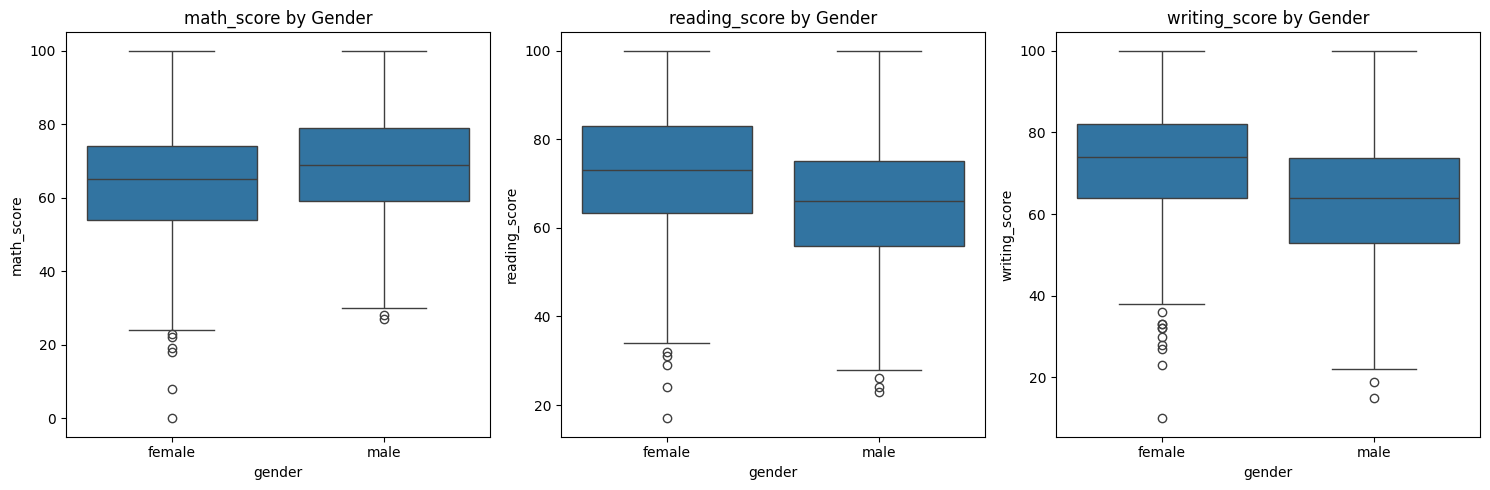

In [12]:
# Gender vs Scores
plt.figure(figsize=(15, 5))
for i, score in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='gender', y=score)
    plt.title(f'{score} by Gender')
plt.tight_layout()
plt.show()

Key Insight: Female students tend to perform better in reading and writing, while male students show slightly better math scores.

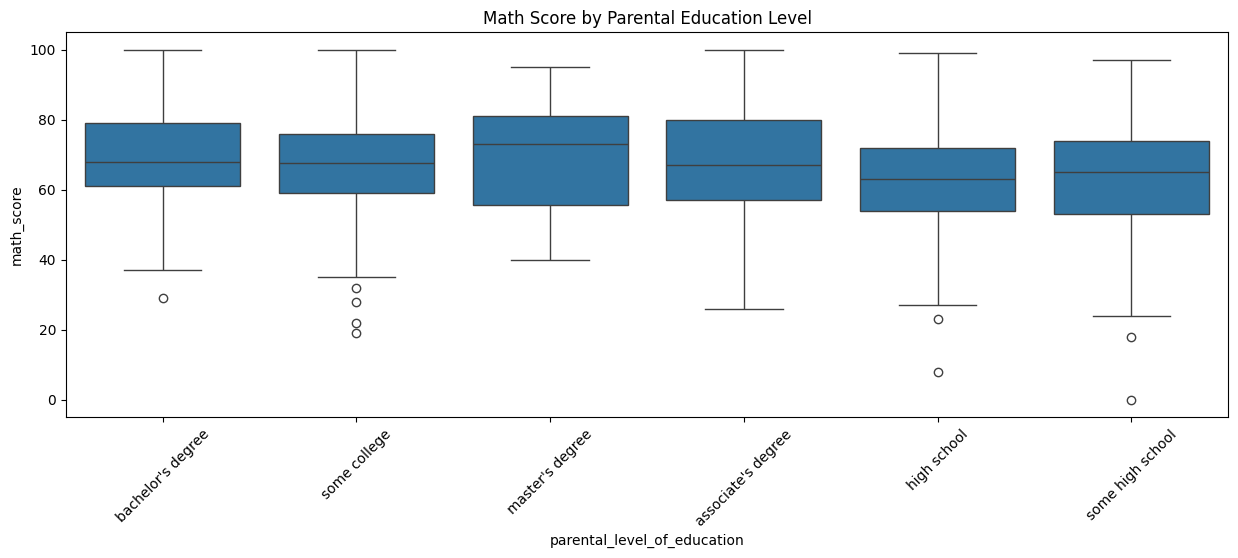

In [13]:
# Parental Education vs Scores
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='parental_level_of_education', y='math_score')
plt.title('Math Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

Key Insight: Higher parental education correlates with better student performance.

In [17]:
# Identified outliers
outliers = df[(df['math_score'] == 0) | 
              (df['reading_score'] < 20) | 
              (df['writing_score'] < 20)]
print(outliers)

     gender race_ethnicity parental_level_of_education         lunch  \
59   female        group C            some high school  free/reduced   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
59                     none           0             17             10   
327                    none          28             23             19   
596                    none          30             24             15   

     total score    average  
59            27   9.000000  
327           70  23.333333  
596           69  23.000000  


1 student scored 0 in math   
3 students scored <20 in reading/writing 

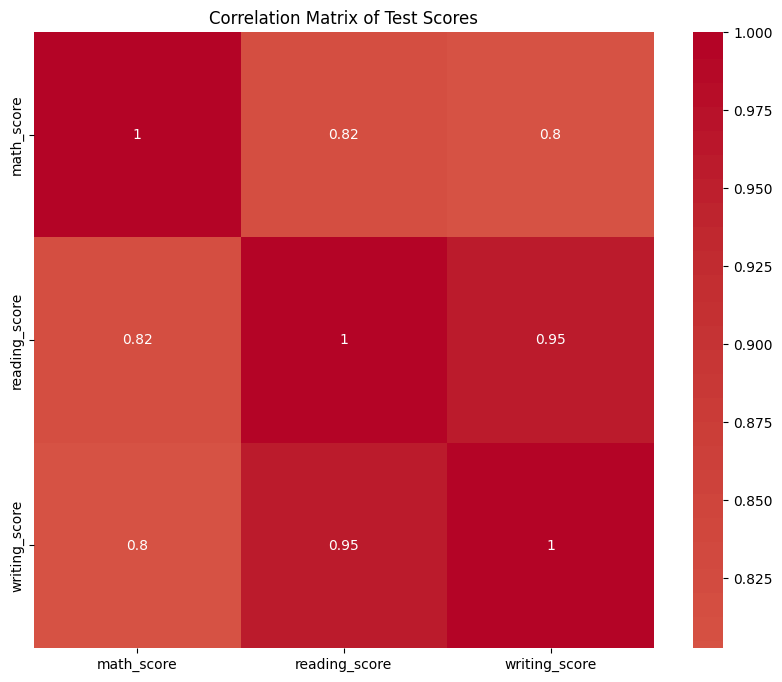

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Test Scores')
plt.show()